In [18]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

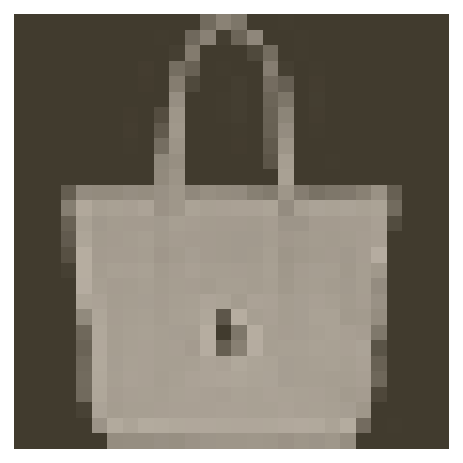

In [19]:
# sample image
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [35]:
from torch import nn, optim
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        
        self.dropout = nn.Dropout(p=0.2)
            
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [36]:
# train and test
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        ## TODO: Implement the validation pass and print out the validation accuracy
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.604..  Test Loss: 0.544..  Test Accuracy: 0.808
Epoch: 2/30..  Training Loss: 0.485..  Test Loss: 0.498..  Test Accuracy: 0.824
Epoch: 3/30..  Training Loss: 0.453..  Test Loss: 0.481..  Test Accuracy: 0.832
Epoch: 4/30..  Training Loss: 0.440..  Test Loss: 0.523..  Test Accuracy: 0.823
Epoch: 5/30..  Training Loss: 0.421..  Test Loss: 0.459..  Test Accuracy: 0.840
Epoch: 6/30..  Training Loss: 0.415..  Test Loss: 0.482..  Test Accuracy: 0.836
Epoch: 7/30..  Training Loss: 0.411..  Test Loss: 0.450..  Test Accuracy: 0.845
Epoch: 8/30..  Training Loss: 0.398..  Test Loss: 0.478..  Test Accuracy: 0.838
Epoch: 9/30..  Training Loss: 0.393..  Test Loss: 0.471..  Test Accuracy: 0.843
Epoch: 10/30..  Training Loss: 0.398..  Test Loss: 0.482..  Test Accuracy: 0.845
Epoch: 11/30..  Training Loss: 0.388..  Test Loss: 0.483..  Test Accuracy: 0.842
Epoch: 12/30..  Training Loss: 0.389..  Test Loss: 0.475..  Test Accuracy: 0.841
Epoch: 13/30..  Training Loss: 0.383.

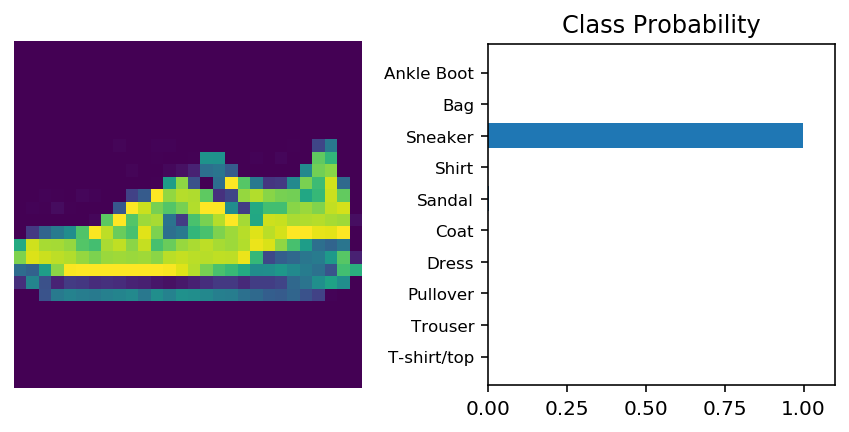

In [38]:
# inference
import helper

# test out

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.view(1, 784)

# class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# plot
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')